# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [98]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [99]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | naranjal
Processing Record 4 of Set 1 | ketchikan
Processing Record 5 of Set 1 | haiku-pauwela
Processing Record 6 of Set 1 | ashchysay
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | kavaratti
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | robore
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | crane
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | ulysses
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Se

In [100]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [101]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,16.22,88,20,3.09,PT,1706824403
1,whitehorse,60.7161,-135.0538,-15.55,51,100,5.14,CA,1706824403
2,naranjal,-2.6667,-79.6167,27.77,90,100,1.87,EC,1706824403
3,ketchikan,55.3422,-131.6461,9.08,93,100,1.54,US,1706824398
4,haiku-pauwela,20.9219,-156.3051,26.76,68,20,2.06,US,1706824403


In [102]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [106]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,16.22,88,20,3.09,PT,1706824403
1,whitehorse,60.7161,-135.0538,-15.55,51,100,5.14,CA,1706824403
2,naranjal,-2.6667,-79.6167,27.77,90,100,1.87,EC,1706824403
3,ketchikan,55.3422,-131.6461,9.08,93,100,1.54,US,1706824398
4,haiku-pauwela,20.9219,-156.3051,26.76,68,20,2.06,US,1706824403


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

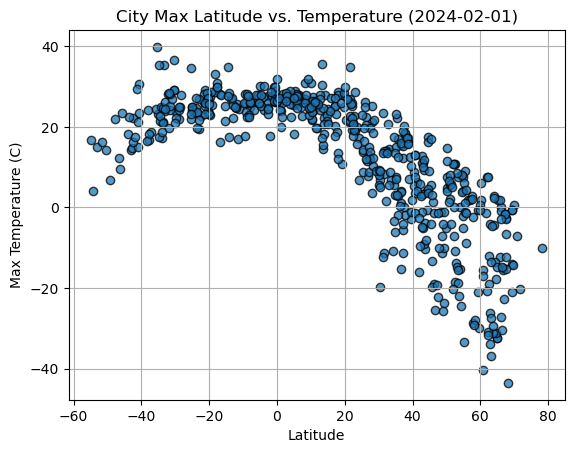

In [107]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
date_in_title = pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({date_in_title})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

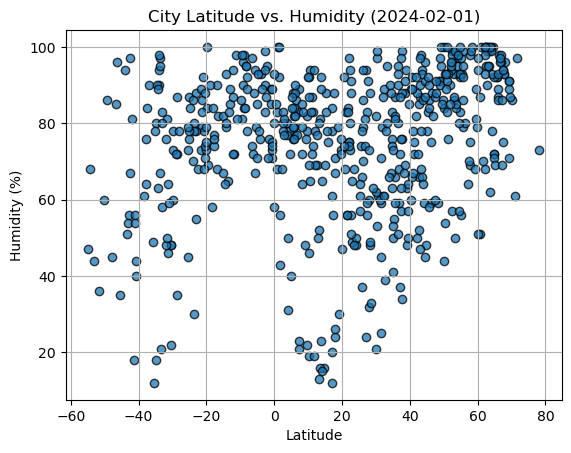

In [109]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
date_in_title = pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')
plt.title(f"City Latitude vs. Humidity ({date_in_title})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

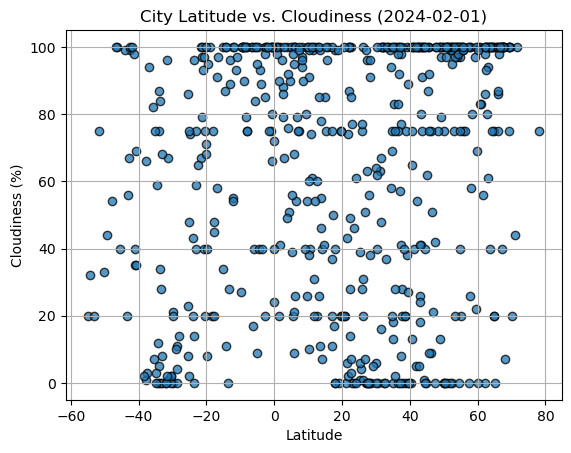

In [110]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
date_in_title = pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')
plt.title(f"City Latitude vs. Cloudiness ({date_in_title})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

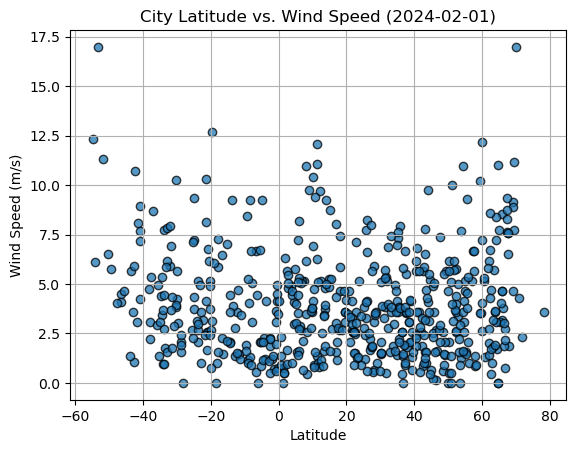

In [112]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
date_in_title = pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')
plt.title(f"City Latitude vs. Wind Speed ({date_in_title})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [113]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, x_label, y_label, coordinates):
    """
    Create a linear regression plot and annotate with the linear regression equation.

    Parameters:
    - x_values: The x-axis data
    - y_values: The y-axis data
    - title: The title of the plot
    - x_label: The label for the x-axis
    - y_label: The label for the y-axis
    - coordinates: A tuple specifying the position for annotation (text coordinates on the plot)

    Returns:
    None
    """
    

In [114]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,16.22,88,20,3.09,PT,1706824403
1,whitehorse,60.7161,-135.0538,-15.55,51,100,5.14,CA,1706824403
3,ketchikan,55.3422,-131.6461,9.08,93,100,1.54,US,1706824398
4,haiku-pauwela,20.9219,-156.3051,26.76,68,20,2.06,US,1706824403
5,ashchysay,43.5542,68.8889,-10.40,94,91,4.68,KZ,1706824403


In [115]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,naranjal,-2.6667,-79.6167,27.77,90,100,1.87,EC,1706824403
6,adamstown,-25.0660,-130.1015,24.83,87,48,9.35,PN,1706824403
10,margaret river,-33.9500,115.0667,17.27,90,5,2.73,AU,1706824403
11,robore,-18.3333,-59.7500,33.05,58,20,0.00,BO,1706824404
15,puerto baquerizo moreno,-0.9000,-89.6000,27.55,89,75,3.09,EC,1706824344


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8172686825731839


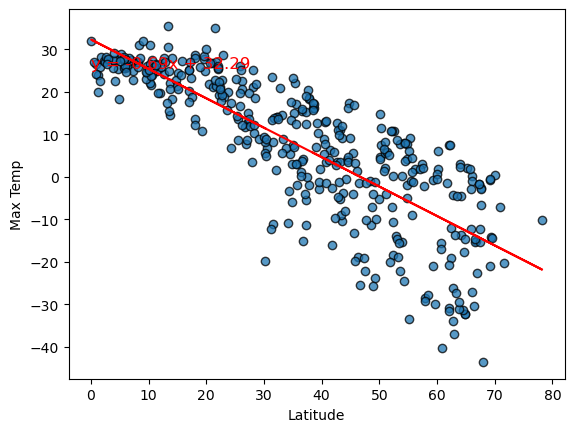

In [122]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)

# Print the r-value to the console
print(f"The r-value is: {rvalue_northern}")

# Calculate regression values using Northern Hemisphere coefficients
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_northern, regress_values_northern, "r-", label="Linear Regression")

# Annotate linear regression equation
line_eq_northern = f"y = {round(slope_northern, 2)}x + {round(intercept_northern, 2)}"
plt.annotate(line_eq_northern, (min(x_values_northern), max(y_values_northern) - 10), fontsize=12, color="red")

# Graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Show plot
plt.show()


The r-value for the Southern Hemisphere is: 0.4716608293323062


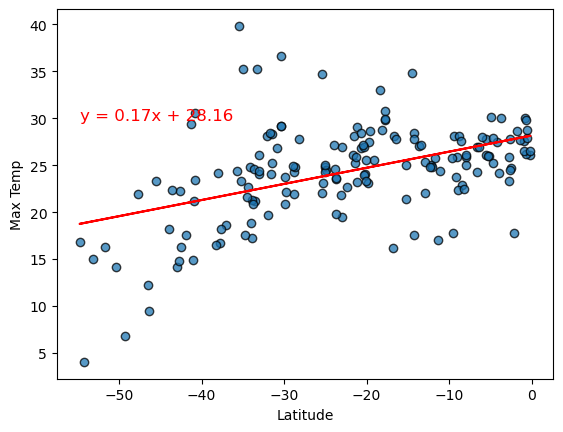

In [124]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern) = linregress(x_values_southern, y_values_southern)

# Print the r-value to the console for the Southern Hemisphere
print(f"The r-value for the Southern Hemisphere is: {rvalue_southern}")

# Calculate regression values using Southern Hemisphere coefficients
regress_values_southern = x_values_southern * slope_southern + intercept_southern

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_southern, regress_values_southern, "r-", label="Linear Regression")

# Annotate linear regression equation for the Southern Hemisphere
line_eq_southern = f"y = {round(slope_southern, 2)}x + {round(intercept_southern, 2)}"
plt.annotate(line_eq_southern, (min(x_values_southern), max(y_values_southern) - 10), fontsize=12, color="red")

# Graph properties for the Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Show plot for the Southern Hemisphere
plt.show()


**Discussion about the linear relationship:** 
- Both hemispheres exhibit a negative linear relationship between latitude and maximum temperature.
- The r-value for the Southern Hemisphere indicates a stronger negative correlation compared to the Northern Hemisphere.
    - The more negative r-value suggests a more pronounced linear relationship between latitude and maximum temperature.
- While latitude provides a valuable indicator, comprehensive climate analysis requires consideration of various influencing factors.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40567842780439506


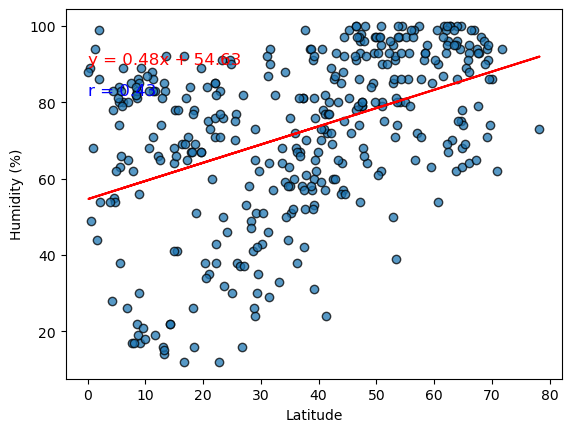

In [88]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Select data for Humidity vs. Latitude in the Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]

# Perform linear regression for the Northern Hemisphere
(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)

# Print the r-value to the console
print(f"The r-value is: {rvalue}")

# Calculate regression values
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_northern, regress_values_northern, "r-", label="Linear Regression")

# Annotate linear regression equation
line_eq_northern = f"y = {round(slope_northern, 2)}x + {round(intercept_northern, 2)}"
plt.annotate(line_eq_northern, (min(x_values_northern), max(y_values_northern) - 10), fontsize=12, color="red")

# Annotate r-value
r_value_annotation_northern = f"r = {round(rvalue_northern, 2)}"
plt.annotate(r_value_annotation_northern, (min(x_values_northern), max(y_values_northern) - 18), fontsize=12, color="blue")

# Graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Show plot
plt.show()

The r-value is: 0.40567842780439506


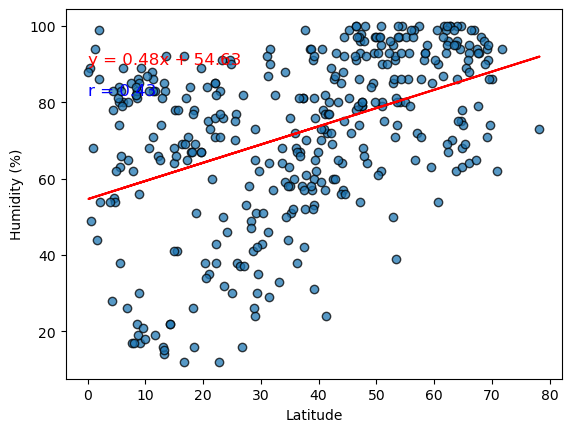

In [89]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Select data for Humidity vs. Latitude in the Southern Hemisphere
x_values_southern = northern_hemi_df["Lat"]
y_values_southern = northern_hemi_df["Humidity"]

# Perform linear regression for the Sourthern Hemisphere
(slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern) = linregress(x_values_southern, y_values_southern)

# Print the r-value to the console
print(f"The r-value is: {rvalue}")

# Calculate regression values
regress_values_southern = x_values_southern * slope_southern + intercept_southern

# Create scatter plot for the Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line for the Southern Hemisphere
plt.plot(x_values_southern, regress_values_southern, "r-", label="Linear Regression")

# Annotate linear regression equation for the Southern Hemisphere
line_eq_southern = f"y = {round(slope_southern, 2)}x + {round(intercept_southern, 2)}"
plt.annotate(line_eq_southern, (min(x_values_southern), max(y_values_southern) - 10), fontsize=12, color="red")

# Annotate r-value for the Southern Hemisphere
r_value_annotation_southern = f"r = {round(rvalue_southern, 2)}"
plt.annotate(r_value_annotation_southern, (min(x_values_southern), max(y_values_southern) - 18), fontsize=12, color="blue")

# Graph properties for the Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure for the Southern Hemisphere
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs_Humidity_Linear_Regression.png")

# Show plot for the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE